<a href="https://colab.research.google.com/github/Namakando-ApertureScience/Torch-training/blob/main/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [672]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [673]:
# Import torch
import torch
import torch.nn as nn

# Setup device agnostic code
device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else "cpu"
print(device)

# Setup random seed
RANDOM_SEED = 42

cpu


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [674]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=RANDOM_SEED)
print(f"Ten samples of the moon data; X: {X[:10]} y: {y[:10]}")

Ten samples of the moon data; X: [[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 [ 0.37736316 -0.39703717]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]
 [ 1.6201408  -0.28758856]
 [ 0.68246733  0.80712069]] y: [1 1 1 1 0 1 1 1 1 0]


In [675]:
# Turn data into a DataFrame
import pandas as pd

frame = pd.DataFrame({"X1":X[:, 0],
                      "X2":X[:, 1],
                      "y":y})
frame.head()

,X1,X2,y
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


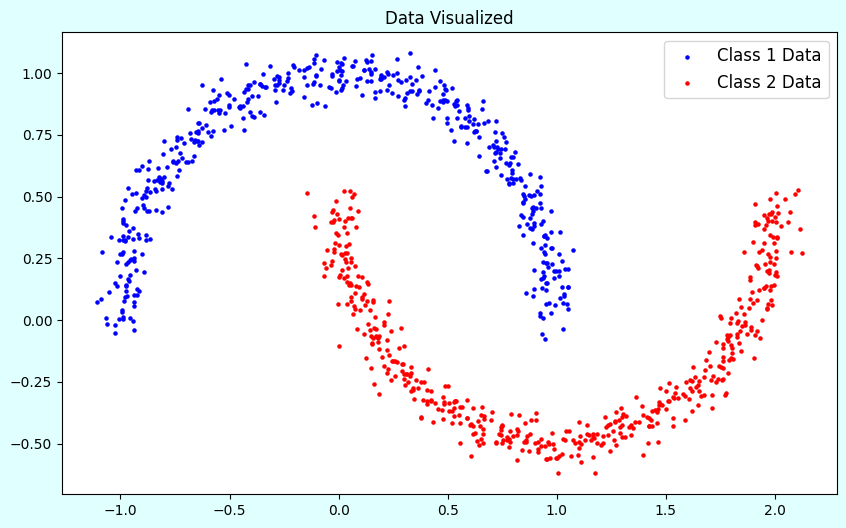

In [676]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

class_1 = [x for x, y_ in list(zip(X, y)) if y_ == 0]
class_1T = list(zip(*class_1))

class_2 = [x for x, y_ in list(zip(X, y)) if y_ == 1]
class_2T = list(zip(*class_2))

plt.figure(figsize=(10, 6), facecolor="lightcyan")
plt.title("Data Visualized")
plt.scatter(class_1T[0], class_1T[1], s=5, c="blue", label="Class 1 Data")
plt.scatter(class_2T[0], class_2T[1], s=5, c="red", label="Class 2 Data")
plt.legend(prop={"size":12})
plt.show()

In [677]:
# Turn data into tensors of dtype float
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED,
                                                    shuffle=True, stratify=y,)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [678]:
# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self, in_features, out_features, hidden_units):
      super().__init__()
      self.NN = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features),
        nn.ReLU()
        )

    def forward(self, X):
        ## Your code here ##
        return self.NN(X).squeeze()

# Instantiate the model
## Your code here ##
torch.manual_seed(RANDOM_SEED)
ModelV0 = MoonModelV0(2, 1, 10).to(device)
ModelV0

MoonModelV0(
  (NN): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): ReLU()
  )
)

In [679]:
ModelV0.state_dict()

OrderedDict([('NN.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('NN.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('NN.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [680]:
# Setup loss function
loss_function = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(ModelV0.parameters(), lr = 0.05)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [681]:
# What's coming out of our model?

ModelV0.eval()
with torch.inference_mode():
  logits = ModelV0(X_train.to(device))[:10].squeeze()

# logits (raw outputs of model)
print(f"Logits: {logits}")
## Your code here ##

# Prediction probabilities
probs = torch.sigmoid(logits)
print(f"Pred probs: {probs}")
## Your code here ##

# Prediction labels
label = torch.round(probs)
print(f"Pred labels: {label}")
## Your code here ##

Logits: tensor([0.0274, 0.0250, 0.0017, 0.0075, 0.0022, 0.0005, 0.0015, 0.0278, 0.0284,
        0.0054])
Pred probs: tensor([0.5069, 0.5063, 0.5004, 0.5019, 0.5005, 0.5001, 0.5004, 0.5069, 0.5071,
        0.5013])
Pred labels: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [682]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [683]:
# Setup epochs
epochs = 10000

# Send data to the device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training

  ModelV0.train()

  # 1. Forward pass (logits output)
  logits_train = ModelV0(X_train)

  # Turn logits into prediction probabilities
  pred_train = torch.sigmoid(logits_train)

  # 2. Calculaute the loss
  loss = loss_function(pred_train, y_train) # loss = compare model raw outputs to desired model outputs

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  if epoch % (epochs//20) == 0:

    ModelV0.eval()
    with torch.inference_mode():

      # 1. Forward pass (to get the logits)
      logits_test = ModelV0(X_test)

      # Turn the test logits into prediction labels
      pred_test = torch.sigmoid(logits_test)
      label_pred_test = torch.round(pred_test).squeeze()

      # 2. Caculate the test loss/acc
      loss_test = loss_function(pred_test, y_test)
      acc = acc_fn(label_pred_test, y_test.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

      # Print out what's happening every 100 epochs
      print(f"Epochs: {epoch}  Loss: {loss_test:.3f}  Accuracy: {acc*100:.1f}%")


Epochs: 0  Loss: 0.725  Accuracy: 29.0%
Epochs: 500  Loss: 0.724  Accuracy: 64.5%
Epochs: 1000  Loss: 0.720  Accuracy: 75.5%
Epochs: 1500  Loss: 0.708  Accuracy: 79.0%
Epochs: 2000  Loss: 0.692  Accuracy: 86.0%
Epochs: 2500  Loss: 0.680  Accuracy: 93.0%
Epochs: 3000  Loss: 0.673  Accuracy: 93.5%
Epochs: 3500  Loss: 0.669  Accuracy: 93.5%
Epochs: 4000  Loss: 0.666  Accuracy: 95.0%
Epochs: 4500  Loss: 0.664  Accuracy: 95.5%
Epochs: 5000  Loss: 0.663  Accuracy: 95.5%
Epochs: 5500  Loss: 0.661  Accuracy: 96.5%
Epochs: 6000  Loss: 0.659  Accuracy: 96.5%
Epochs: 6500  Loss: 0.658  Accuracy: 96.5%
Epochs: 7000  Loss: 0.656  Accuracy: 96.5%
Epochs: 7500  Loss: 0.654  Accuracy: 97.0%
Epochs: 8000  Loss: 0.653  Accuracy: 97.0%
Epochs: 8500  Loss: 0.651  Accuracy: 97.0%
Epochs: 9000  Loss: 0.649  Accuracy: 98.0%
Epochs: 9500  Loss: 0.649  Accuracy: 98.0%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [684]:
import numpy as np

# Plot the model predictions
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

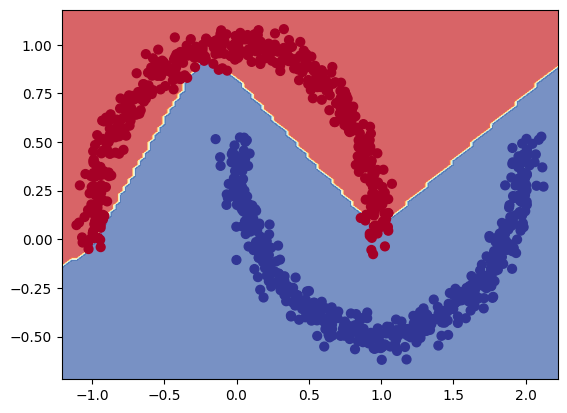

In [685]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(ModelV0, X, y)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [686]:
# Create a straight line tensor
line_X = torch.arange(-4, 4, 0.01)
print(len(line_X), line_X.dtype)

800 torch.float32


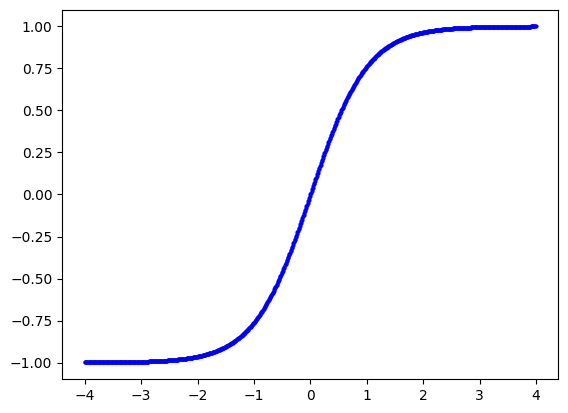

In [687]:
# Test torch.tanh() on the tensor and plot it
tanh_y = line_X.tanh()
plt.scatter(line_X, tanh_y, s=4, c="blue")
plt.show()

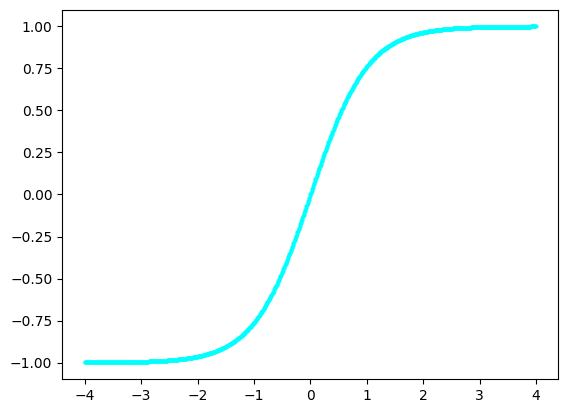

In [688]:
# Replicate torch.tanh() and plot it
tanh_y_rep = lambda x: (torch.exp(2*x) - 1) / (torch.exp(2*x) + 1)
plt.scatter(line_X, tanh_y_rep(line_X), s=4, c="cyan")
plt.show()

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

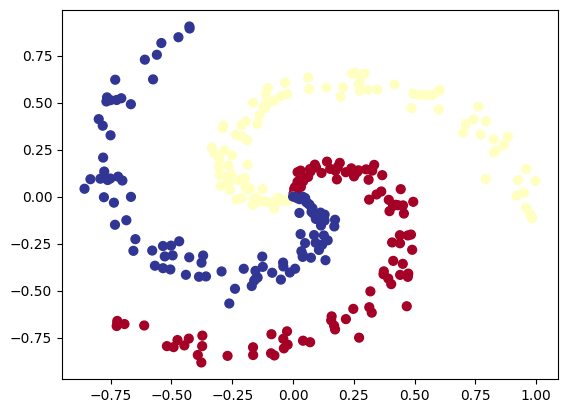

In [689]:
# Code for creating a spiral dataset from CS231n
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [690]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, shuffle=True, stratify=y)

In [691]:
frame = pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "label": y})
frame

,X1,X2,label
0,0.000000,0.000000,0
1,0.000129,0.010100,0
2,0.004218,0.019757,0
3,0.012517,0.027597,0
4,0.004628,0.040138,0
...,...,...,...
295,-0.731319,0.621286,2
296,-0.471405,0.847402,2
297,-0.541631,0.816480,2
298,-0.425397,0.893833,2


In [692]:
# Let's calculuate the accuracy for when we fit our model

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [693]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class MulticlassModel(nn.Module):

  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features),
        nn.ReLU()
    )

  def forward(self, X):
    return self.net(X).squeeze()

# Instantiate model and send it to device
torch.manual_seed(RANDOM_SEED)
ModelV1 = MulticlassModel(2, 3, 20).to(device)
ModelV1

MulticlassModel(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): ReLU()
  )
)

In [694]:
ModelV1.state_dict()

OrderedDict([('net.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230]])),
             ('net.0.bias',
              tensor([ 0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265,
     

In [695]:
# Setup data to be device agnostic
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)
ModelV1.eval()
with torch.inference_mode():
  logits = ModelV1(X_train)[:10]

print(f"Logits: {logits}")
## Your code here ##

preds = torch.softmax(logits, dim=1)
print(f"Pred probs: {preds}")
## Your code here ##

pred_labels = torch.argmax(preds, dim=1)
print(f"Pred labels: {pred_labels.int()}")
## Your code here ##

Logits: tensor([[0.0000, 0.0281, 0.0877],
        [0.0000, 0.0453, 0.0591],
        [0.0000, 0.0039, 0.0534],
        [0.0000, 0.0546, 0.1060],
        [0.0000, 0.0613, 0.1148],
        [0.0000, 0.0094, 0.0000],
        [0.0000, 0.0339, 0.0914],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0339, 0.0281],
        [0.0000, 0.0096, 0.0627]])
Pred probs: tensor([[0.3205, 0.3296, 0.3499],
        [0.3218, 0.3367, 0.3414],
        [0.3269, 0.3282, 0.3449],
        [0.3157, 0.3334, 0.3510],
        [0.3140, 0.3338, 0.3522],
        [0.3323, 0.3354, 0.3323],
        [0.3195, 0.3305, 0.3500],
        [0.3333, 0.3333, 0.3333],
        [0.3265, 0.3377, 0.3358],
        [0.3253, 0.3284, 0.3463]])
Pred labels: tensor([2, 2, 2, 2, 2, 1, 2, 0, 1, 2], dtype=torch.int32)


In [696]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ModelV1.parameters(), lr=0.01)

In [697]:
# Build a training loop for the model

# Loop over data
epochs = 1000

for epoch in range(epochs):

  ## Training
  ModelV1.train()

  # 1. Forward pass
  logits_train = ModelV1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(logits_train, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  if epoch % (epochs//20) == 0:

    ModelV1.eval()
    with torch.inference_mode():

      # 1. Forward pass
      logits_test = ModelV1(X_test)
      preds_test = torch.softmax(logits_test, dim=1)
      pred_labels = torch.argmax(preds_test, dim=1)

      # 2. Caculate loss and acc
      loss_test = loss_fn(logits_test, y_test)
      acc = acc_fn(pred_labels, y_test.int())

      # Print out what's happening every 100 epochs
      print(f"Epochs: {epoch} Loss: {loss_test:.2f} Accuracy: {100*acc:.1f}%")

Epochs: 0 Loss: 1.09 Accuracy: 46.7%
Epochs: 50 Loss: 0.55 Accuracy: 68.3%
Epochs: 100 Loss: 0.16 Accuracy: 96.7%
Epochs: 150 Loss: 0.09 Accuracy: 96.7%
Epochs: 200 Loss: 0.07 Accuracy: 96.7%
Epochs: 250 Loss: 0.07 Accuracy: 98.3%
Epochs: 300 Loss: 0.07 Accuracy: 98.3%
Epochs: 350 Loss: 0.07 Accuracy: 98.3%
Epochs: 400 Loss: 0.07 Accuracy: 98.3%
Epochs: 450 Loss: 0.07 Accuracy: 98.3%
Epochs: 500 Loss: 0.07 Accuracy: 98.3%
Epochs: 550 Loss: 0.07 Accuracy: 98.3%
Epochs: 600 Loss: 0.07 Accuracy: 98.3%
Epochs: 650 Loss: 0.07 Accuracy: 98.3%
Epochs: 700 Loss: 0.07 Accuracy: 98.3%
Epochs: 750 Loss: 0.08 Accuracy: 98.3%
Epochs: 800 Loss: 0.08 Accuracy: 98.3%
Epochs: 850 Loss: 0.08 Accuracy: 96.7%
Epochs: 900 Loss: 0.08 Accuracy: 96.7%
Epochs: 950 Loss: 0.08 Accuracy: 96.7%


In [698]:
# Print out first 10 untrained model outputs (forward pass)
ModelV1.eval()
with torch.inference_mode():
  logits = ModelV1(X_train)[:10]

print(f"Logits: {logits}")
## Your code here ##

preds = torch.softmax(logits, dim=1)
print(f"Pred probs: {preds}")
## Your code here ##

pred_labels = torch.argmax(preds, dim=1)
print(f"Pred labels: {pred_labels.int()}")
## Your code here ##

Logits: tensor([[14.3964,  0.0000,  3.5034],
        [ 2.7019, 20.3090,  0.0000],
        [ 0.4503,  0.0000, 11.4428],
        [ 1.9240, 10.1667,  1.3754],
        [ 0.0000, 14.6435,  0.7413],
        [ 0.0000,  0.0000, 14.2703],
        [11.9143,  0.0000,  3.0582],
        [ 0.0000,  0.0000, 11.1645],
        [ 4.3754, 14.1311,  0.0000],
        [ 2.9284,  0.0370, 13.1007]])
Pred probs: tensor([[9.9998e-01, 5.5938e-07, 1.8588e-05],
        [2.2560e-08, 1.0000e+00, 1.5132e-09],
        [1.6827e-05, 1.0726e-05, 9.9997e-01],
        [2.6306e-04, 9.9958e-01, 1.5198e-04],
        [4.3691e-07, 1.0000e+00, 9.1696e-07],
        [6.3460e-07, 6.3460e-07, 1.0000e+00],
        [9.9985e-01, 6.6928e-06, 1.4248e-04],
        [1.4168e-05, 1.4168e-05, 9.9997e-01],
        [5.7955e-05, 9.9994e-01, 7.2928e-07],
        [3.8213e-05, 2.1208e-06, 9.9996e-01]])
Pred labels: tensor([0, 1, 2, 1, 1, 2, 0, 2, 1, 2], dtype=torch.int32)


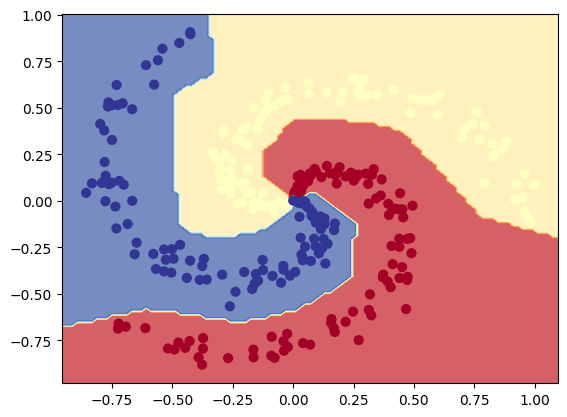

In [699]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(ModelV1, X, y)